# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Create a Beautiful Soup object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# Extract all rows of data

table_rows = soup.find_all('tr')

# Display the first few rows to check
table_rows[:5]

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in table_rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    row_data = [col.get_text(strip=True) for col in cols] 
    mars_data.append(row_data)

In [7]:

# Defines the column names based on the table headers
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

# Create a Pandas DataFrame
mars_df = pd.DataFrame(mars_data, columns=columns)



In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
# Convert data types
mars_df["id"] = mars_df["id"].astype(int)
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df["sol"] = mars_df["sol"].astype(int)
mars_df["ls"] = mars_df["ls"].astype(int)
mars_df["month"] = mars_df["month"].astype(int)
mars_df["min_temp"] = mars_df["min_temp"].astype(float)
mars_df["pressure"] = mars_df["pressure"].astype(float)



In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = mars_df["month"].nunique()
num_months

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_df["sol"].nunique()
num_sols

1867

In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_df.groupby("month")["min_temp"].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

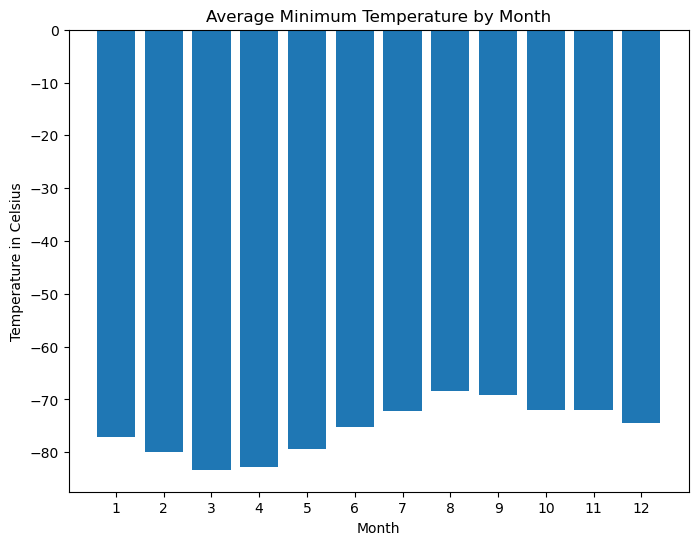

In [16]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8,6))
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month.values)

# Labels and title
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.title("Average Minimum Temperature by Month")

# Ensure all months (1-12) appear on the x-axis
plt.xticks(ticks=range(1, 13), labels=range(1, 13))

# Show plot
plt.show()

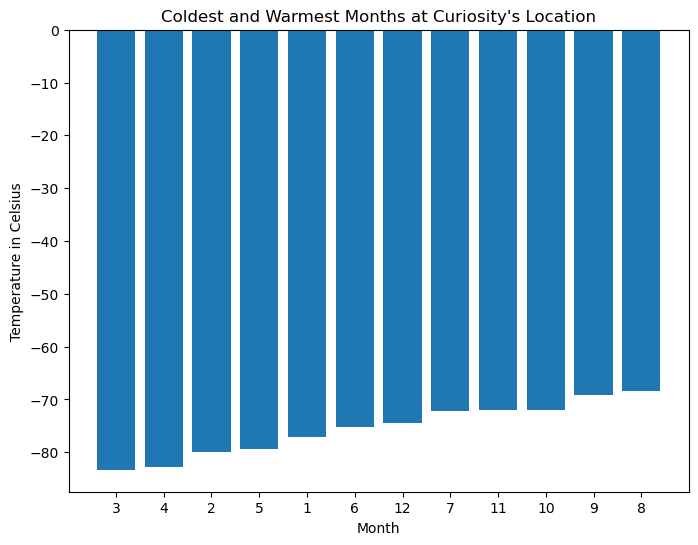

In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperature by month (coldest to warmest)
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

# Convert month numbers to strings to maintain order
sorted_months = sorted_avg_min_temp.index.astype(str)

# Plot the sorted average minimum temperature
plt.figure(figsize=(8,6))
plt.bar(sorted_months, sorted_avg_min_temp.values)

# Labels and title
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.title("Coldest and Warmest Months at Curiosity's Location")

# Ensure the X-axis labels display months in the correct sorted order
plt.xticks(ticks=range(len(sorted_months)), labels=sorted_months)

# Show plot
plt.show()

In [20]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby("month")["pressure"].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

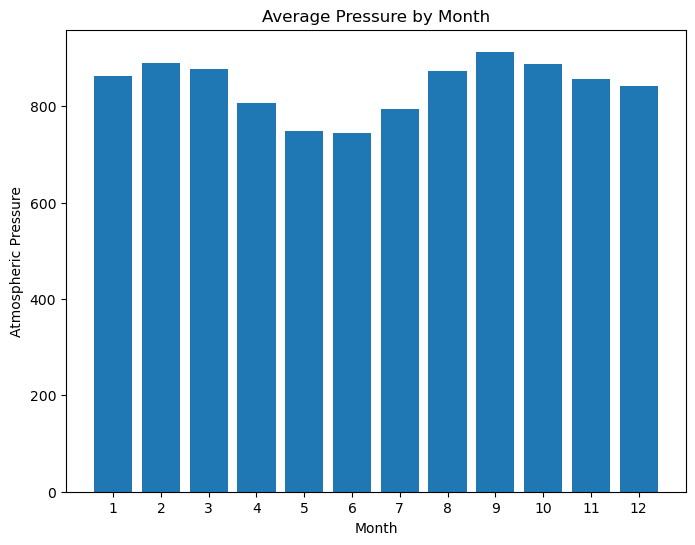

In [21]:
# Plot the average pressure by month
plt.figure(figsize=(8,6))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values)

# Labels and title
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")

# Ensure all months (1-12) appear on the x-axis
plt.xticks(ticks=range(1, 13), labels=range(1, 13))

# Show plot
plt.show()

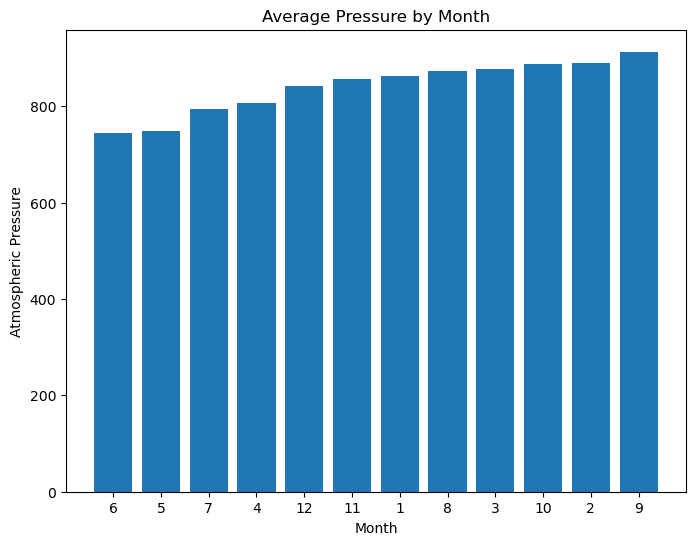

In [23]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average atmospheric pressure by month (lowest to highest)
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Convert month numbers to strings to maintain correct order
sorted_pressure_months = sorted_avg_pressure.index.astype(str)

# Plot the sorted average atmospheric pressure
plt.figure(figsize=(8,6))
plt.bar(sorted_pressure_months, sorted_avg_pressure.values)

# Labels and title
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")

# Ensure X-axis follows correct sorted order
plt.xticks(ticks=range(len(sorted_pressure_months)), labels=sorted_pressure_months)

# Show plot
plt.show()

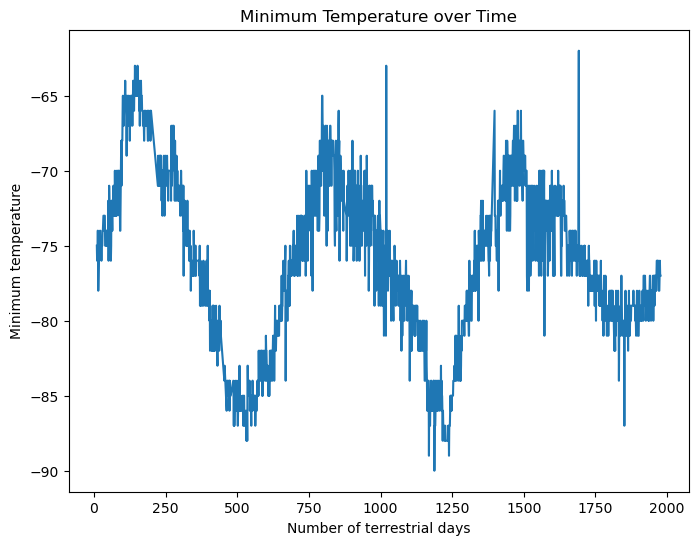

In [24]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Plot daily minimum temperature over time

plt.figure(figsize=(8,6))
plt.plot(mars_df["sol"], mars_df["min_temp"])

# Labels and title
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.title("Minimum Temperature over Time")

# Show plot
plt.show()

#### Minimum Temperature

The coldest month on Mars is Month 3 (-83.3°C), while the warmest month is Month 8 (-68.4°C).  The seasonal temperature cycle shows that colder temperatures occur earlier in the year, warming up around Month 8.  This variation could be due to Mars axial tilt, which can affect solar exposure similarly to Earth’s seasons.

#### Atmospheric Pressure

The lowest atmospheric pressure occurs in Month 6 (745 Pa), while the highest pressure is in Month 9 (913 Pa).  Mars thiner atmosphere expands and contracts seasonally, which can influence these variations.  This pressure cycle may impact dust storms and other weather patterns on the planet.

#### Year Length

By analyzing temperature fluctuations over time, we are able to  estimate a Martian year lasts ~687 Earth days.  This aligns with Mars’ orbit around the Sun, which is almost twice as long as Earth’s (~365 days).  The cyclical pattern of temperature helps to confirm this estimate.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
mars_df.to_csv("mars_weather_data.csv", index=False)

In [26]:
browser.quit()